<a href="https://colab.research.google.com/github/syedanida/deep-learning-multimodal-colabs/blob/main/7_Hugging_Face_Transformers_Agents_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face Transformers Agents Demonstration

In [1]:
!pip install -q "transformers>=4.35.0" "huggingface_hub>=0.19.0" "transformers-agents>=0.1.0" openai torch pillow

ERROR: Could not find a version that satisfies the requirement transformers-agents>=0.1.0 (from versions: none)
ERROR: No matching distribution found for transformers-agents>=0.1.0


In [2]:
import os
import time
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [3]:
# Check installed packages
!pip show transformers-agents

In [6]:
# Import the agent after installing
try:
    from transformers_agents import HfAgent
    print("Successfully imported HfAgent from transformers_agents")
except ImportError as e:
    print(f"Error importing HfAgent: {e}")
    print("Falling back to pipeline-based approach")

Error importing HfAgent: No module named 'transformers_agents'
Falling back to pipeline-based approach


In [7]:
# For demonstration, we'll try both approaches
try:
    # Try to initialize the agent
    print("\nInitializing HfAgent...")
    agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
    print("Agent initialized successfully!")

    # Example 1: Image captioning with the agent
    print("\nExample 1: Image Captioning with HfAgent")
    image_url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"
    try:
        caption = agent.run("Generate a caption for this image", image=image_url)
        print(f"Caption: {caption}")
    except Exception as e:
        print(f"Error with agent image captioning: {e}")

    # Example 2: Text generation with the agent
    print("\nExample 2: Text Generation with HfAgent")
    try:
        text = agent.run("Write a short poem about artificial intelligence")
        print(f"Generated text: {text}")
    except Exception as e:
        print(f"Error with agent text generation: {e}")

except Exception as e:
    print(f"Error initializing agent: {e}")
    print("Continuing with pipeline-based approach...")

# Alternative approach using Hugging Face pipelines
print("\n--- Hugging Face Pipelines Demonstration ---")


Initializing HfAgent...
Error initializing agent: name 'HfAgent' is not defined
Continuing with pipeline-based approach...

--- Hugging Face Pipelines Demonstration ---


In [8]:
from transformers import pipeline

# Example 1: Text Generation
print("\nExample 1: Text Generation with pipeline")
generator = pipeline('text-generation', model='gpt2')
prompt = "Artificial intelligence has transformed"
print(f"Prompt: '{prompt}'")


Example 1: Text Generation with pipeline


Device set to use cpu


Prompt: 'Artificial intelligence has transformed'


In [9]:
# Generate text
result = generator(prompt, max_length=50, num_return_sequences=1)
generated_text = result[0]['generated_text']
print(f"Generated text: '{generated_text}'")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text: 'Artificial intelligence has transformed our lives: our children will learn to play the role of child, and to watch our loved ones and siblings walk the walk around them, giving it new life. But there also exist opportunities for us all, and when it'



Example 2: Image Captioning with pipeline


Device set to use cpu


Image URL: https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg


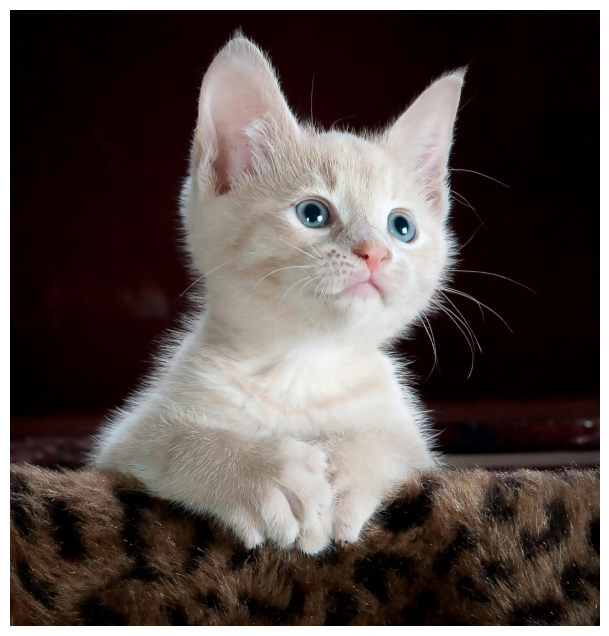

Generated caption: 'a kitten with blue eyes sitting on a fur'


In [10]:
# Example 2: Image Captioning with pipeline
print("\nExample 2: Image Captioning with pipeline")
try:
    # Load an image captioning model
    image_to_text = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

    # Sample image URL
    image_url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"
    print(f"Image URL: {image_url}")

    # Download and process the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Generate caption
    caption = image_to_text(img)[0]['generated_text']
    print(f"Generated caption: '{caption}'")
except Exception as e:
    print(f"Error with image captioning: {e}")

In [11]:
# Example 3: Question Answering
print("\nExample 3: Question Answering")
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

context = """
Hugging Face is an AI company that develops tools for building applications using machine learning.
It was founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf. The company is best
known for its Transformers library, which provides pre-trained models for natural language processing
tasks. Hugging Face also offers the Model Hub, a platform for sharing and discovering machine learning models.
"""

question = "When was Hugging Face founded?"
print(f"Question: '{question}'")
print(f"Context: '{context[:100]}...'")

qa_result = qa_pipeline(question=question, context=context)
print(f"Answer: '{qa_result['answer']}' (Score: {qa_result['score']:.2f})")

# Show how to use ReactCodeAgent if available
try:
    from transformers_agents import ReactCodeAgent
    print("\nExample 4: Using ReactCodeAgent")

    # Create an agent
    react_agent = ReactCodeAgent(
        tools=["python_interpreter"],  # Use Python interpreter tool
    )

    # Run a simple Python task
    result = react_agent.run("Generate a list of prime numbers up to 50")
    print(f"Result: {result}")

    # Try another example
    math_result = react_agent.run("Calculate 15 * 7 + 23")
    print(f"Math calculation: {math_result}")

except ImportError:
    print("\nReactCodeAgent not available in current version")
    print("Demonstrating alternative code generation:")

    # Code generation as alternative
    print("\nExample 4: Code Generation")
    code_generator = pipeline('text-generation', model='gpt2')
    code_prompt = "def find_primes(n):\n    \"\"\"Find all prime numbers up to n.\"\"\"\n    "
    code_result = code_generator(code_prompt, max_length=200, num_return_sequences=1)
    print(f"Generated code:\n{code_result[0]['generated_text']}")


Example 3: Question Answering


Device set to use cpu


Question: 'When was Hugging Face founded?'
Context: '
Hugging Face is an AI company that develops tools for building applications using machine learning....'
Answer: '2016' (Score: 0.98)

ReactCodeAgent not available in current version
Demonstrating alternative code generation:

Example 4: Code Generation


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated code:
def find_primes(n):
    """Find all prime numbers up to n."""
     __type__ = n

return  :prim_seq

}

# The function returns a valid sequence of primes (e.g.

# (:p i-1) -> (:x i-3) or (:n x-1) ->

# (:p n-1) -> (:p n-2) or (:x n-3) ->

# (:p n-4)) or (:x n-7))

def gen_p ( i, n, p ):

assert (n!= 0 )

for x in p, w in enumerate ( gen_p_len ):

if i < w:

self._first_digit = random.randint ( i as long, 10, w )



In [12]:
# Example 5: Create a custom multi-purpose tool that combines capabilities
print("\nExample 5: Custom Multi-purpose Tool")

class AIAssistant:
    """A custom AI assistant that combines multiple capabilities."""

    def __init__(self):
        self.classifier = pipeline('sentiment-analysis')
        self.summarizer = pipeline('summarization', model='sshleifer/distilbart-cnn-12-6')
        self.qa = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

    def analyze_sentiment(self, text):
        """Analyze the sentiment of the given text."""
        return self.classifier(text)[0]

    def summarize(self, text):
        """Summarize the given text."""
        return self.summarizer(text, max_length=60, min_length=20, do_sample=False)[0]['summary_text']

    def answer_question(self, question, context):
        """Answer a question based on the given context."""
        return self.qa(question=question, context=context)

    def process_request(self, request_type, **kwargs):
        """Process a request of the specified type with the given arguments."""
        if request_type == 'sentiment':
            return self.analyze_sentiment(kwargs['text'])
        elif request_type == 'summarize':
            return self.summarize(kwargs['text'])
        elif request_type == 'question':
            return self.answer_question(kwargs['question'], kwargs['context'])
        else:
            return f"Unknown request type: {request_type}"


Example 5: Custom Multi-purpose Tool


In [13]:
# Create the assistant
assistant = AIAssistant()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Device set to use cpu
Device set to use cpu


In [14]:
# Test with different requests
print("Testing custom AI assistant:")

# Sentiment analysis
sentiment_text = "I love how versatile these transformer models are!"
sentiment = assistant.process_request('sentiment', text=sentiment_text)
print(f"\nSentiment analysis of '{sentiment_text}':")
print(f"  {sentiment['label']} (Score: {sentiment['score']:.2f})")

# Summarization
long_text = """
The field of artificial intelligence has seen tremendous progress in recent years.
From advancements in natural language processing to computer vision, AI systems are becoming increasingly
capable of performing tasks that once required human intelligence. This has led to applications across
various industries, including healthcare, finance, transportation, and entertainment. However, with these
advancements come challenges related to ethics, privacy, and potential economic disruption.
"""
summary = assistant.process_request('summarize', text=long_text)
print(f"\nSummary of long text:")
print(f"  '{summary}'")

# Question answering
qa = assistant.process_request('question',
                              question="What challenges come with AI advancements?",
                              context=long_text)
print(f"\nAnswer to question 'What challenges come with AI advancements?':")
print(f"  '{qa['answer']}' (Score: {qa['score']:.2f})")

Testing custom AI assistant:

Sentiment analysis of 'I love how versatile these transformer models are!':
  POSITIVE (Score: 1.00)

Summary of long text:
  ' AI systems are becoming increasingly capable of performing tasks that once required human intelligence . This has led to applications across various industries, including healthcare, finance, transportation, and entertainment . But with these advancements come challenges related to ethics, privacy, and potential economic disruption .'

Answer to question 'What challenges come with AI advancements?':
  'ethics, privacy, and potential economic disruption' (Score: 0.71)
